In [21]:
import numpy as np
from numpy import linalg as la
import matplotlib.pyplot as plt
import fractions


# Uncomment for fractions
# np.set_printoptions(formatter={'all':lambda x: str(fractions.Fraction(x).limit_denominator())}) 

# Uncomment for decimals
np.set_printoptions(formatter={})

In [22]:
# Matrix X (alle Werte, ohne 1-er Spalte, ohne y-Werte)
X_u = np.array([
    [0],
    [1],
    [2]
])

# Lösungsvektor, alle y-Werte
y = np.array(
    [1, 1, 3]
)

In [23]:
# Add column of 1 for Constant
X = np.c_[X_u, np.ones(X_u.shape[0])]

# X^T*X, P & Q
print(f'X^T * X:\n{X.T@X}')
P = X@la.inv((X.T@X))@X.T
print(f'\nProjektionsmatrix P:\n{np.around(P, 4)}')
print(f'\nResidualmatrix Q:\n{np.around(np.eye(len(X))-P, 4)}')

X^T * X:
[[5. 3.]
 [3. 3.]]

Projektionsmatrix P:
[[ 0.8333  0.3333 -0.1667]
 [ 0.3333  0.3333  0.3333]
 [-0.1667  0.3333  0.8333]]

Residualmatrix Q:
[[ 0.1667 -0.3333  0.1667]
 [-0.3333  0.6667 -0.3333]
 [ 0.1667 -0.3333  0.1667]]


In [24]:
# Calculate b hat
b_hat = la.inv(X.T@X)@X.T@y
# Rounding
b_hat_r = np.around(b_hat, 4)

print(f'\nb_hat: {b_hat}\nb_hat gerundet: {b_hat_r}')
y_hat = X@b_hat
print(f'\ny_hat: {y_hat}\ny_hat gerundet: {np.around(y_hat, 4)}')
e = y - y_hat
print(f'\ne: {e}\ne gerundet: {np.around(e, 4)}')
s = "\nFunktion = "
for i, b in enumerate(b_hat_r):
    if i+1 != len(b_hat_r):
        s = s + f'x{i}*{b} + '
    else: 
        s = s + str(b)
print(s)

# Calculate R^2
y_ = np.average(y)
sqt = (y - y_).T@(y - y_)
sqe = (y_hat - y_).T@(y_hat - y_)
sqr = (y - y_hat).T@(y - y_hat)
r2 = sqe/sqt

print(f'\nSQT: {sqt}, gerundet: {round(sqt, 4)}')
print(f'SQE: {sqe}, gerundet: {round(sqe, 4)}')
print(f'SQR: {sqr}, gerundet: {round(sqr, 4)}')
print(f'R^2: {r2}, gerundet: {round(r2, 4)}')




b_hat: [1.         0.66666667]
b_hat gerundet: [1.     0.6667]

y_hat: [0.66666667 1.66666667 2.66666667]
y_hat gerundet: [0.6667 1.6667 2.6667]

e: [ 0.33333333 -0.66666667  0.33333333]
e gerundet: [ 0.3333 -0.6667  0.3333]

Funktion = x0*1.0 + 0.6667

SQT: 2.666666666666667, gerundet: 2.6667
SQE: 2.000000000000002, gerundet: 2.0
SQR: 0.6666666666666665, gerundet: 0.6667
R^2: 0.7500000000000008, gerundet: 0.75


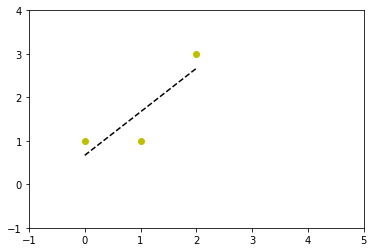

In [25]:
X_1 = X_u[:, 0]

if X_u.shape[1] == 1:
    coef = np.polyfit(X_1,y,1)
    poly1d_fn = np.poly1d(coef) 
    # poly1d_fn is now a function which takes in x and returns an estimate for y

    plt.plot(X_1,y, 'yo', X_1, poly1d_fn(X_1), '--k') #'--k'=black dashed line, 'yo' = yellow circle marker

    plt.xlim(-1, 5)
    plt.ylim(-1, 4)